# Explainable AI

## Worksheet 0: Refresher - Machine Learning Models

**Learning outcomes:**
In this lab you will go through a machine learning pipeline. The goal is to refresh your memory on the different steps typically involved in machine learning tasks. By the end of the lab, you should remember how to:
- load, visualize, and preprocess data
- split data into training and testing data
- build and evaluate a K-Nearest Neighbours model
- build and evaluate a simple neural network.


We do *not* expect you to know these models perfectely, but just to have a rough idea how they work, and how to use python libraries. For more information to the presented and other models, we will point you to some additional documentation.

**Prerequisites**  
- Basic knowledge of `python` is assumed for this course. If you haven't used Python before or need a refresher, we can recommend the following [python tutorial](http://bebi103.caltech.edu/2015/tutorials/t1a_intro_to_python.html) as a starting point.
- Basic knowledge of `numpy` is assumed for this course. If you haven't used numpy before or need a refresher, we can recommend the following [numpy tutorial](http://cs231n.github.io/python-numpy-tutorial/#python).

---
### What defines a Transparent ML model, what defines an Opaque ML model?

By definition, **transparent** ML models are inherently understandable with respect to their inner workings and their output. Transparent models can be classified as *simulatable* models, *decomposable* models, and *algorithmically transparent* models. Often transparent models fall into multiple classifications, while **opaque** models are those that are generally more complex and do not fall into any transparent classification, but as a positive consequence often outperform transparent models. For further information on the topic and definitions, we refer students to the lecture slides (*preface to ML*).

---

---

### Today's problem

We will try to cover a different research question in every worksheet. This week we will take the position of a sommelier, and we will try to predict the quality of wine.

**Data information:** The data set is taken from [UCI](https://archive.ics.uci.edu/ml/datasets/wine+quality), but was originally used in [Cortez et al. 2009](https://www.sciencedirect.com/science/article/pii/S0167923609001377). However, for the purpose of this worksheet, we will load the data set from the `sklearn` library, where it is already slightly preprocessed. The rows contain different wines, while the columns contain chemical properties of the wines. The last column contains a grading of the wine into three groups: low, medium, high.

---

# 1. Setting Up the Work Environment, Loading Data, and Preprocessing

## 1.A Importing Libraries

We will always start by loading all the libraries we will need throughout the worksheet at the top. It is good practice to load all of the libraries in one place. If you want to run the worksheet on your local machine, make sure that you have installed all the libraries.

In [1]:
import pandas as pd # Library for data processing
import numpy as np # Library for efficient mathematical operations

import matplotlib.pyplot as plt # Library for plotting
import seaborn as sns # Library with additional plotting options

# Scikit-learn is a library for machine learning a
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


# Tensorflow is a libary for deep learning by Google
import tensorflow as tf

## 1.B Importing Datasets

Now that we have the libraries set up, let's continue by loading the data. The dataset is contained within the `sklearn` library.

In [2]:
from sklearn import datasets # Sklearn has a couple of well-known datasets

wine = datasets.load_wine()

Throughout the different workshops, you will come across many different data structures, such as
- numpy `arrays`
- pandas `Dataframes`
- sklearn `Bunch`

Let's check the data structure of the dataset we have loaded above.

In [3]:
type(wine)

sklearn.utils._bunch.Bunch

It's an sklearn `Bunch` data structure. Panda's `Dataframe` structure and its library functions are very powerful to inspect, visualize, and preprocess the data. In addition, it is compatible with every major machine learning library, so let's transform our dataset to a `Dataframe`.

In [4]:
# Transform the dataset into a pandas Dataframe structure
wine_df = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])
wine_df.head() #Print the first few dataset entries

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


## 1.C Data Inspection and Visualization

Before we start performing any analysis on the data, it is a good idea to check what the data looks like. What are the columns and rows? Is the data clean (e.g. are there entries missing, are the types consistent within the columns, ...)? Finally, it's always helpful to visualise the data to see some trends, distributions, outliers,...

Above, we have already printed the first five lines from the dataset. Next, we can check what the features are, and what type of data these features are stored in.

In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

All the data in our dataset are numeric values. This is good news, as any machine learning method needs the information in numeric format, and this saves us to transform the data. The next thing, that is always interesting is to look at the distributions of the different features and how they correlate between each other. Seaborn is a very powerful plotting library, which allows you to do so with just one line.

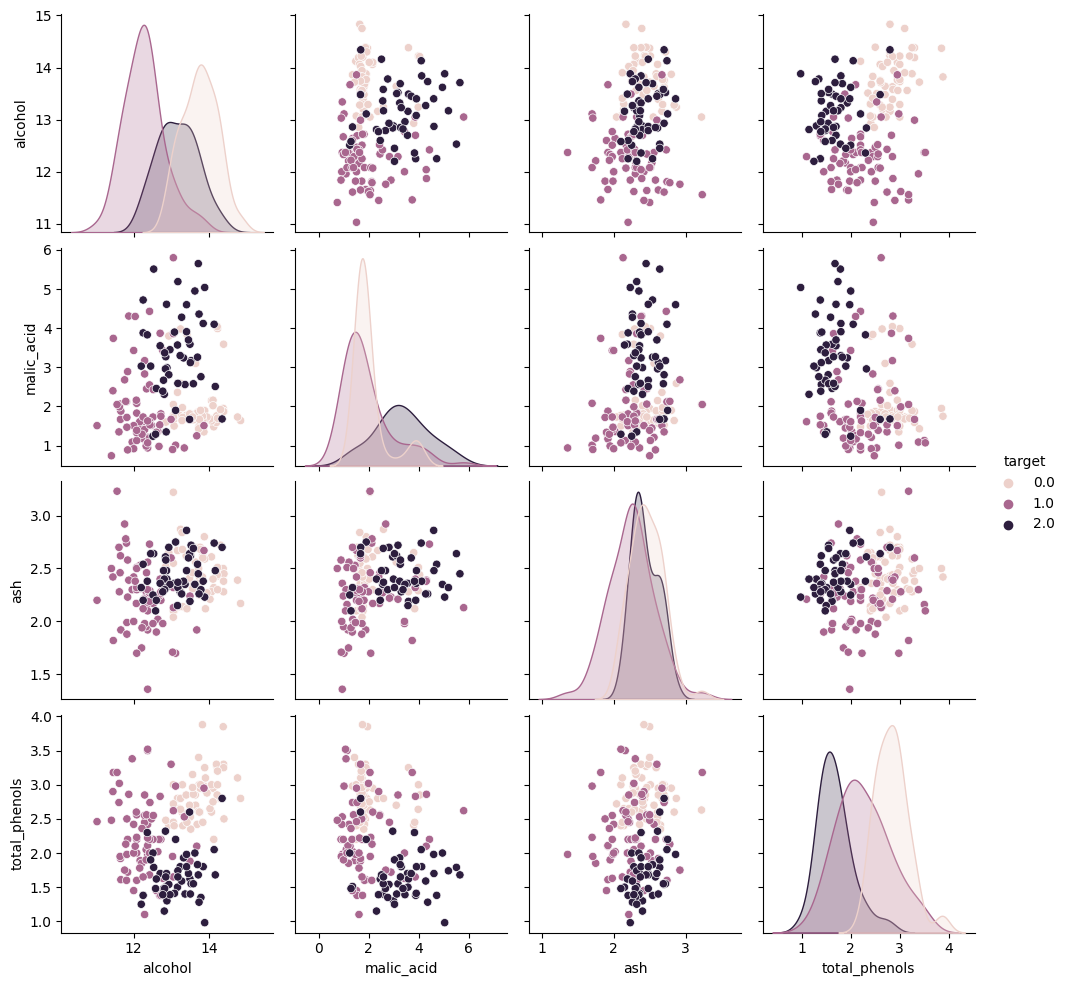

In [6]:
# We are only plotting a subset of the features, as otherwise the plot becomes unreadable.
#But you can play around and have a look at the other features.
sns.pairplot(wine_df[['alcohol', 'malic_acid', 'ash', 'total_phenols', 'target']], hue='target')

Just by eyeballing, we can see that some features will be more predictive for the quality of wine (`target`) than others.

We have only plotted five of the features, as otherwise the plot becomes unreadable. One good way to visualize high-dimensional data is to use **Principal Component Analysis**, which allows us to map high dimensional data onto fewer dimensions. If you need a refresher on PCA, check out this [tutorial](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60).

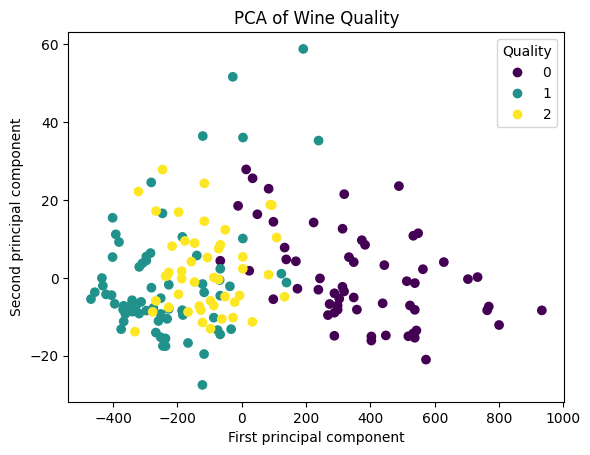

In [7]:
pca = PCA(n_components=11).fit(wine_df.loc[:, wine_df.columns != 'target'])
pca_result = pca.transform(wine_df.loc[:, wine_df.columns != 'target'])

fig, ax = plt.subplots()
scatter = ax.scatter(x=pca_result[:, 0], y=pca_result[:, 1], c=wine_df['target'])
ax.legend(*scatter.legend_elements(),loc="upper right", title="Quality")
ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')
ax.set_title('PCA of Wine Quality')
plt.show()

## 1.D Data Preprocessing

At this point you should preprocess your data. With most datasets you find, you will probably have to clean the data first. This can include: changing string values to numeric values, removing or changing NaN values, rescaling your data and much more. In our case, the data is already pretty clean. All we have to do is to apply a standard scaler.   

In [8]:
labels = wine_df['target']
wine_df.drop(columns=['target'], inplace=True) # We cut out the target, as we don't want to rescale it, as those are categories
standardizer = StandardScaler()
standardized_wine = standardizer.fit_transform(wine_df)
features = pd.DataFrame(standardized_wine, index=wine_df.index, columns=wine_df.columns)

Now, that we have standardized the data, let's see how PCA performs.

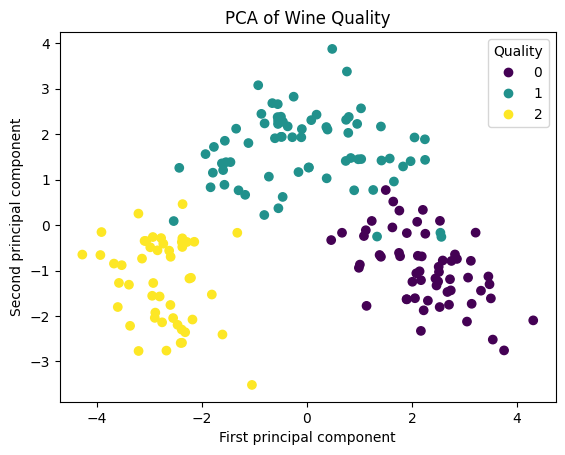

In [9]:
pca = PCA(n_components=11).fit(features)
pca_result = pca.transform(features)

fig, ax = plt.subplots()
scatter = ax.scatter(x=pca_result[:, 0], y=pca_result[:, 1], c=labels)
ax.legend(*scatter.legend_elements(),loc="upper right", title="Quality")
ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')
ax.set_title('PCA of Wine Quality')
plt.show()

Here, you can already see how important it can be to preprocess the data. PCA is very dependent on the scale of the different features. This is why scaling is so important. Now the different qualities of wine are already much more seperable.

Last step: to test how good our model is, we will split our data into training and testing data.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

# 2 Transparent Modelling

A transparent model implies that the model structure and means of prediction are inherently understandable.​ Models that can be defined as transparent include:

*   [Linear/Logistic Regression](https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2)
*   [Decision Trees](https://towardsdatascience.com/decision-tree-in-python-b433ae57fb93)
*   [Bayesian Networks](https://towardsdatascience.com/introduction-to-bayesian-networks-81031eeed94e)
*   KNN

In this worksheet, we will only look into KNNs, but feel free to checkout the other tutorials we can recommend.

---
## 2.A K-Nearest Neighbours (KNN)

KNN is a supervised machine learning algorithm. KNN can be used for regression as well as classification problems. In this lab, we will use it for classification, as each wine has one of a number of distinct ratings.

Suppose we are presented with a previously unseen data point, but we do not know its class. K-Nearest Neighbour predicts that the class (or label) of this point depends on the labels of the *K* data points closest to it.  This definition prompts two questions:

- How do we chose the number of neighbours?
- How do we weight the "votes" of each neighbour on the classification. It seems reasonable that a neighbour closer to the unseen data point should have a larger weight than one which is further away.

There are numerous options to chose from when deciding what the "closeness" of two data points should be decided on. For example, we can use the Euclidean distance, which is the square root of the sum of squares of the different coordinates of two data points, or in a formula: $\mathrm{euclideanDistance}((x_1, y_1),(x_2, y_2))= \sqrt{ (x_1-x_2)^2+(y_1-y_2)^2 }$

However, there are many more options to chose from:
- Manhattan distance (sum of absolute values of differences between points)
- Minkowski distance (the generalization of the Euclidean distance and Manhattan distance, by taking the $p$-th root and $p$-th power of the differences)
- Cosine distance (looking at the angle formed by two points and the origin).

If you are interested, and want to get a better idea of what the cosine distance is, and how it differs to the Euclidean distance, we can recommend this [blog post](https://cmry.github.io/notes/euclidean-v-cosine).

---

### Question 1:

What happens when you choose $K$ too small and what happens when you choose $K$ too large?

**Answer:**

## 2.B.1 How do we find the optimal $K$?

Above, you have thought about what the problems might be by choosing a bad $K$. So how do we choose $K$? Well, the answer sadly is there is no simple answer, and it will depend on your data, and the way of getting to the optimal solution is heuristic.

For example, you can run the KNN algorithm with different values of $K$, and plot the result on a graph, where on one axis, you have the values of $K$ and on the other axis you have the accuracy of the model.

Scikit-learn has its built in KNN classifier. All ML models in `sklearn` work similarly. That is, you create an instance of `KNeighborsClassifier()`, then you `.fit()` it with your training data, and finally you can `.predict()` on new data.
The first parameter of interest, is of course `n_neighbors=k`, which is set to 5 by default. The second parameter of interest is, as discussed above, the metric which we use to compute which neighbours are closest to a new data point. By default it is `metric='minkowski'`, in that case you need to define `p` the parameter of the Minkowski distance, which is set by default to 2. Thus, by default sklearn uses the Euclidean distance as a metric to compute the closest neighbours.
Finally, you can choose whether or not the distance of each neighbour should be used as a weight, to decide which neighbour's class should be weighted more. You can set it to `weights='distance'`, otherwise each neighbour will be weighted the same.

We will now run KNN 100 times each time with a different $K$. Predict the classes of our test set, and compute the accuracy of each model. Then, to decide on the best model, we plot $K$ vs the accuracy of each model.


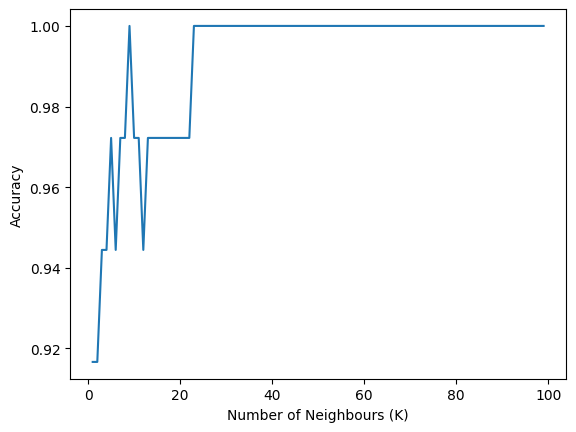

In [11]:
accuracy = []
for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train, y_train)
    prediction_test = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, prediction_test))

plt.plot(range(1, 100), accuracy)
plt.xlabel("Number of Neighbours (K)")
plt.ylabel("Accuracy")
plt.show()

### Question 2:

You can now see for which $K$ you have the highest accuracy. The goal of machine learning, however, is that it generalizes well. Is the best model you found above, also the best model in general for new incoming data? Will you and another student have the same plot? If you have several models with similar accuracy, which model would you choose?

**Answer**:

## 2.B Test vs Validation Data

If one of your models achieved an accuracy of 80%, does that mean that you would get an accuracy of 80% on any unseen data? The answer is no. You will need to test it on unseen data first. However, the problem is that we have already used up all the data.

This leads to the concept of validation, and the important difference between validation and test data. So the first step will be to split our data into three data sets: training data, validation data and test data (which is equivalent to future unseen data).

The problem is that if we split up our data, for example, 60% training data, 20% validation data, and 20% test data (which we are not allowed to touch until the end), we loose 20% of data, which we have previously used for training. That's where k-fold cross-validation comes into play.

We first split the data set into training and testing data, and set the test set aside (e.g. 80-20 ratio). Then, we split the remaining training data randomly into $k$ equal parts.

**Remark:** Sadly the letters $k$ and $K$ are overloaded in the machine learning literature. In this lab, capital $K$ refers to the neighbours and $k$ refers to the number of splits we perform on the training data, but in the literature $k$ is often used for both.

We train our model $k$ times, such that we set one of the $k$ subsets aside (which is the validation data), train with the remaining $k$-1 parts of the training data, and report the accuracy, by predicting on the set aside validation data set. Then, we report the mean of all $k$ loops. We do this for all $K$ models. Then, we choose the model that had the best accuracy, and finally report the accuracy of our model, by predicting the outcome of the test data set, which we have set aside at the very beginning.

If we choose $k$=4 we get the ratio back, we initially decided to split it up with (i.e. 60-20-20).

Scikit-learn has a function that does all that for us: `cross_val_score()`, which we have already loaded above. The first parameter is the model object (you do not need to fit it in advance, the function does it automatically) you want to cross validate (you can use cross-validation for any learning algorithm). The second parameter is the training data (i.e. the 80% you have set aside in the beginning). The third parameter is the associated target value. Then, we specify with `cv=k` the number of folds we want to use, and finally, we specify based on what we want to score our models, e.g. `scoring='accuracy'`. The return value is an array of scores for each fold.

So let's do the following:

- Run cross-validation on your training data with 4 folds.
- Compute the mean of the accuracy of each fold.
- Plot the mean accuracy of each model.
- Choose the best model and report the accuracy of that model on the test data. (Careful: This time we need to fit it first.)

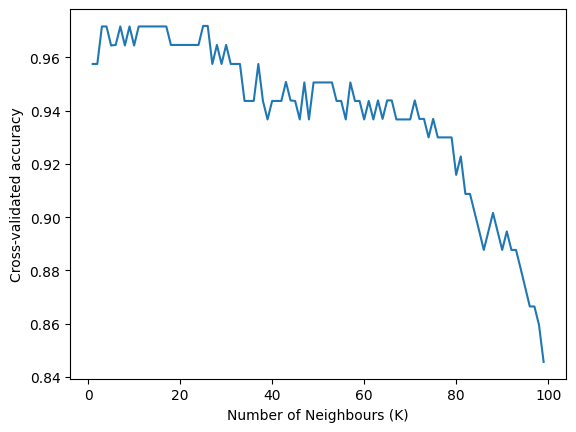

In [12]:
k_range = range(1,100)
k_scores=[]
for K in k_range:
    knn = KNeighborsClassifier(n_neighbors=K, weights='distance')
    accuracy = cross_val_score(knn, X_train, y_train, cv=KFold(n_splits = 4), scoring='accuracy')
    k_scores.append(accuracy.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Number of Neighbours (K)')
plt.ylabel('Cross-validated accuracy')
plt.show()

In [13]:
knn = KNeighborsClassifier(n_neighbors=15, weights='distance')
knn.fit(X_train, y_train)
prediction_test = knn.predict(X_test)
print(accuracy_score(y_test, prediction_test))

0.9722222222222222


### Question 3:
We used the accuracy to score a model, what else could we score it on?

**Answer:**


### Question 4:
You have now trained your model several times. Can you think of limitations/draw backs of KNN?

**Answer:**

---
## 3 Opaque Modelling
Cases of ML models failing to meet the transparency criteria requires an additional method to be applied on the model to interpret its reasoning, hence they are considered opaque.​ Models that are considered opaque include:


*   Random Forest
*   Support Vector Machine
*   Neural Networks

---
## 3.A Neural Network (NNs)

NN are a class of machine learning algorithms used to model complex patterns in datasets using multiple hidden layers and non-linear activation functions. A neural network takes an input, passes it through multiple layers of hidden neurons (mini-functions with unique coefficients that must be learned), and outputs a prediction representing the combined input of all the neurons. This can be done for classification and regression problems. In this lab we'll see an example of classification.​
<img src="nn_image.png">

The example above shows the topology of a multi-layer perceptron (commonly refered to as MLP). The MLP takes the inputs $X$ and forward propagates the input through the hidden-layers and activation function(s) providing the output $\hat{y}$. Once, $\hat{y}$ is produced we can compared it with the true labels $y$ and backpropagate the errors to update the weights of the model.
Mathematically:

$z_{j} = w_{j}^{T} x + b_{j}$ where $w, b, z$ are the weight, bias, and output respectivly.

$g(z) = \frac{1}{1+e^{-z}}$ is the sigmiod activation function, which has a streched S shape.
<img src="sigmoid.png" alt="Drawing" style="width: 200px;/">

cross entropy loss function: $L(z, y) = -[y log(z) + (1-y) log(1-z)]$

learning rate: $\alpha$ or sometimes $\eta$, indicates at which pace the weights get updated.

Using the chain-rule of calculus we can calculate the derivative with respect to $w$ :
$\frac{\partial L(z, y)}{\partial w} =\frac{\partial L(z, y)}{\partial a} \times \frac{\partial a}{\delta z}  \times \frac{\partial z}{\partial w} $

as a result we can update the weights ($w$):
$ w \leftarrow w -a \frac{\partial L(z, y)}{\partial w}$

Updating weights can be summarized:

- Step 1: Take a batch of training data.
- Step 2: Perform forward propagation to obtain the corresponding loss.
- Step 3: Backpropagate the loss to get the gradients.
- Step 4: Use the gradients to update the weights of the network.


### Question 5:
Can you explain in your own terms what a preceptron is, what an activation function is and what backpropagation does?

**Answers:**

## 3.B Implementation of a Neural Network

In [14]:
from IPython.display import HTML
from IPython.display import display

# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true;
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

In [20]:
X = X_train.to_numpy()
y = y_train.to_numpy()
X_testing = X_test.to_numpy()
y_testing = y_test.to_numpy()


# Build the tf.keras.Sequential model by stacking layers. Choose an optimizer and loss function for training
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(13,)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(3)
])

# The losses.SparseCategoricalCrossentropy loss takes a vector of logits and a True index and returns a scalar loss for each example.
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])


# The Model.fit method adjusts the model parameters to minimize the loss.
model.fit(X, y, epochs=5)

# The Model.evaluate method checks the models performance, usually on a "Validation-set" or "Test-set".
model.evaluate(X_testing,  y_testing, verbose=2)

#If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

probability_model(X_testing[:5])


Epoch 1/5
5/5 [==============================] - 3s 16ms/step - loss: 0.9713 - accuracy: 0.5845
Epoch 2/5
5/5 [==============================] - 0s 9ms/step - loss: 0.8114 - accuracy: 0.7535
Epoch 3/5
5/5 [==============================] - 0s 10ms/step - loss: 0.6734 - accuracy: 0.8592
Epoch 4/5
5/5 [==============================] - 0s 11ms/step - loss: 0.5816 - accuracy: 0.9155
Epoch 5/5
5/5 [==============================] - 0s 11ms/step - loss: 0.5082 - accuracy: 0.9366
2/2 - 1s - loss: 0.4160 - accuracy: 0.9167 - 875ms/epoch - 437ms/step


<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.04836125, 0.04721702, 0.9044217 ],
       [0.11603206, 0.15273283, 0.73123515],
       [0.48083296, 0.30892086, 0.21024618],
       [0.04043242, 0.16366939, 0.7958982 ],
       [0.94399875, 0.03208006, 0.0239212 ]], dtype=float32)>

### Question 6:
Implement the neural network, this time with cross-validation (k-fold) and comment on the performance.